<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 173.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 190.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 140.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 168.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 176.6 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [40]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [4]:
##Write your code here
print(df['Industry'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Industry
Non-Null Count  Dtype 
--------------  ----- 
28858 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB
None


In [5]:
print(df['Industry'].describe())

count                    28858
unique                      15
top       Software Development
freq                     11918
Name: Industry, dtype: object


In [6]:
Ind = df['Industry'].value_counts()

In [7]:
Industry = pd.DataFrame(Ind).reset_index()

In [8]:
print(Industry)

                                      Industry  count
0                         Software Development  11918
1                                       Other:   3077
2                                      Fintech   1641
3   Internet, Telecomm or Information Services   1629
4                   Banking/Financial Services   1371
5                                   Healthcare   1277
6                                Manufacturing   1265
7                 Retail and Consumer Services   1264
8                                   Government    962
9                 Media & Advertising Services    894
10                            Higher Education    890
11             Transportation, or Supply Chain    859
12        Computer Systems Design and Services    844
13                                      Energy    578
14                                   Insurance    389


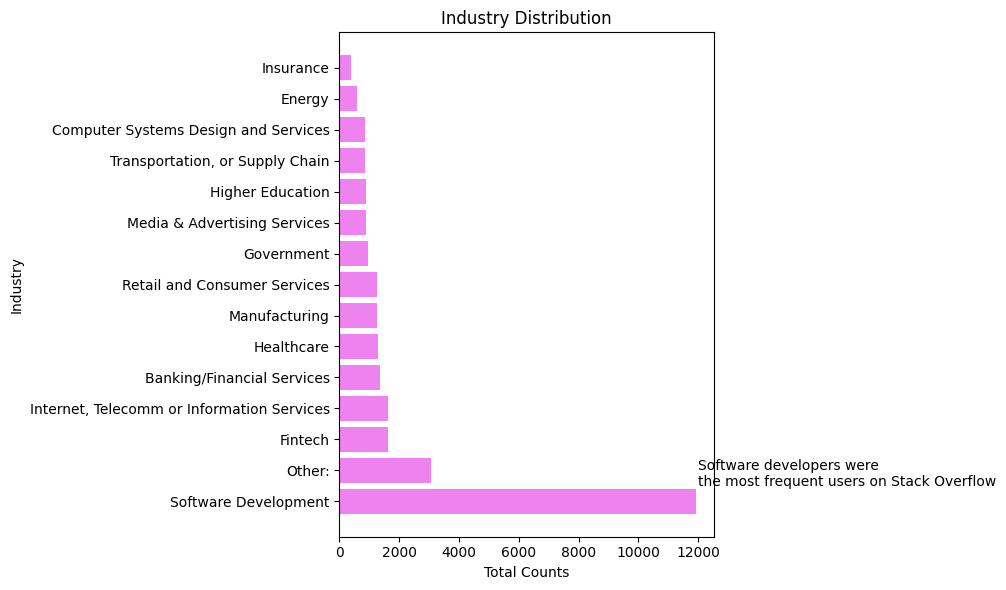

In [9]:
# Create a bar chart 
plt.figure(figsize=(10, 6))
plt.barh(width=Industry['count'], y=Industry['Industry'], color='violet')
plt.title('Industry Distribution')
plt.ylabel('Industry')
plt.xlabel('Total Counts')
plt.annotate("Software developers were", [12000, 1])
plt.annotate('the most frequent users on Stack Overflow', [12000, 0.5])
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


### a. Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

In [10]:
##Write your code here
print(df['ConvertedCompYearly'].describe())

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [11]:
print('The mean of ConvertedCompYearly column is ', '\n', df['ConvertedCompYearly'].mean(), '\n'*2)
print('The median of ConvertedCompYearly column is ','\n', df['ConvertedCompYearly'].median(), '\n'*2)
print('The mean of ConvertedCompYearly column is ','\n', df['ConvertedCompYearly'].mode(), '\n'*2)
print('The standard deviation of ConvertedCompYearly column is ', '\n', df['ConvertedCompYearly'].std(), '\n'*2)

The mean of ConvertedCompYearly column is  
 86155.28726264134 


The median of ConvertedCompYearly column is  
 65000.0 


The mean of ConvertedCompYearly column is  
 0    64444.0
Name: ConvertedCompYearly, dtype: float64 


The standard deviation of ConvertedCompYearly column is  
 186756.97308629757 




**Comments**:

- The standard deviation is larger than the mean, indicating the distribution can be bad and there are NaN values as well as outliers.
- In addition, 3 parameteres of the central tendency are quite varying, especially the mean, which is normally impacted by outliers.
- So, it is likely that the outliers can be removed first before handling of the NaN can be decided.

### b. Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean)
- To assess the outliers, I apply the interquartile rule, for the upper outliers, 1.5*IQR + Q3  and the lower outliers Q1 - 1.5*IQR
  

In [41]:
# Calculate Q1 (25th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
# Calculate Q3 (75th percentile)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1
print('IQR = ', IQR)


IQR =  75259.5


In [42]:
upper_threshold = (1.5*IQR+Q3)
lower_threshold = (Q1-1.5*IQR)
print(upper_threshold)
print(lower_threshold)

In [43]:
print(upper_threshold)
print(lower_threshold)

220860.75
-80177.25


In [44]:
outliers_upper = df[df['ConvertedCompYearly'] <= upper_threshold] # This is to remove the outliers from the upper end

In [45]:
outliers_lower = df[df['ConvertedCompYearly'] >= lower_threshold] # This is to remove the outliers from the lower end

In [46]:
# After outliers removed
df_no_outliers = outliers_lower

In [47]:
# how many lines of data left
df_no_outliers.shape

(23435, 114)

In [48]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

In [49]:
df_no_outliers['ConvertedCompYearly'].isnull().sum()

np.int64(0)

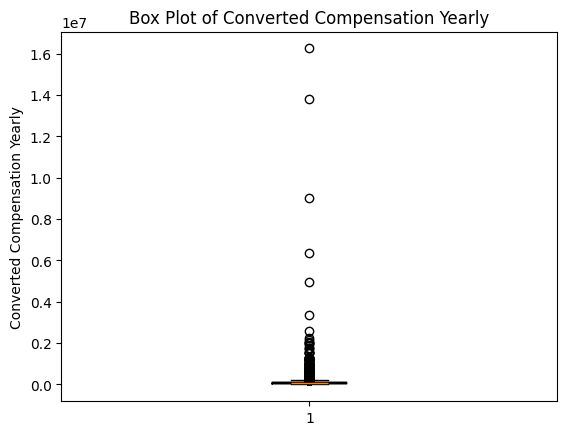

In [50]:
plt.boxplot(df_no_outliers['ConvertedCompYearly'], notch=True)
plt.title('Box Plot of Converted Compensation Yearly')
plt.ylabel('Converted Compensation Yearly')
plt.show()

**Comments:**
- After a substantial amount of NaN and outliers removed, we now can see the distribution of the ConvertedCompYearly column.
- Next, we will try to trim the data further, 3*STD and see if it helped 

In [51]:
print("The new df with outliers removed round 1", df_no_outliers.shape)
print(df_no_outliers['ConvertedCompYearly'].describe(), '\n'*2)
print('The mean of ConvertedCompYearly column is ', '\n', df_no_outliers['ConvertedCompYearly'].mean(), '\n'*2)
print('The median of ConvertedCompYearly column is ','\n', df_no_outliers['ConvertedCompYearly'].median(), '\n'*2)
print('The mean of ConvertedCompYearly column is ','\n', df_no_outliers['ConvertedCompYearly'].mode(), '\n'*2)
print('The standard deviation of ConvertedCompYearly column is ', '\n', df_no_outliers['ConvertedCompYearly'].std(), '\n'*2)

The new df with outliers removed round 1 (23435, 114)
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64 


The mean of ConvertedCompYearly column is  
 86155.28726264134 


The median of ConvertedCompYearly column is  
 65000.0 


The mean of ConvertedCompYearly column is  
 0    64444.0
Name: ConvertedCompYearly, dtype: float64 


The standard deviation of ConvertedCompYearly column is  
 186756.97308629754 




**Comments:**
- The mean, median and mode did not change at all after round 1 of the outlier removal. This indicates when calculating these central tendency parameters, the methods did not include the outliers.


In [52]:
# Set a new threshold
new_threshold = 3*(df_no_outliers['ConvertedCompYearly'].std())
print(new_threshold)

560270.9192588927


In [54]:
second_round_outliers = df_no_outliers[df_no_outliers['ConvertedCompYearly'] <= new_threshold]

In [56]:
second_round_outliers = second_round_outliers[second_round_outliers['ConvertedCompYearly'] >= -(new_threshold)]

In [57]:
print("The new df with outliers removed round 1", second_round_outliers.shape)
print(second_round_outliers['ConvertedCompYearly'].describe(), '\n'*2)
print('The mean of ConvertedCompYearly column is ', '\n', second_round_outliers['ConvertedCompYearly'].mean(), '\n'*2)
print('The median of ConvertedCompYearly column is ','\n', second_round_outliers['ConvertedCompYearly'].median(), '\n'*2)
print('The mean of ConvertedCompYearly column is ','\n', second_round_outliers['ConvertedCompYearly'].mode(), '\n'*2)
print('The standard deviation of ConvertedCompYearly column is ', '\n', second_round_outliers['ConvertedCompYearly'].std(), '\n'*2)

The new df with outliers removed round 1 (23326, 114)
count     23326.000000
mean      79835.054874
std       67889.357116
min           1.000000
25%       32495.000000
50%       64691.000000
75%      107406.000000
max      550000.000000
Name: ConvertedCompYearly, dtype: float64 


The mean of ConvertedCompYearly column is  
 79835.0548743891 


The median of ConvertedCompYearly column is  
 64691.0 


The mean of ConvertedCompYearly column is  
 0    64444.0
Name: ConvertedCompYearly, dtype: float64 


The standard deviation of ConvertedCompYearly column is  
 67889.3571155684 




In [59]:
print("The ConvertedCompYearly has been trimmed down from 65437 to 23326 data points and the number of removed outliers is = ", 65437-23326)

The ConvertedCompYearly has been trimmed down from 65437 to 23326 data points and the number of removed outliers is =  42111


**Comments:**
- After round 2 of the outliers removal, the parameters now changed to a more acceptable distribution with the STD becomes less and the mode and median come even closer.


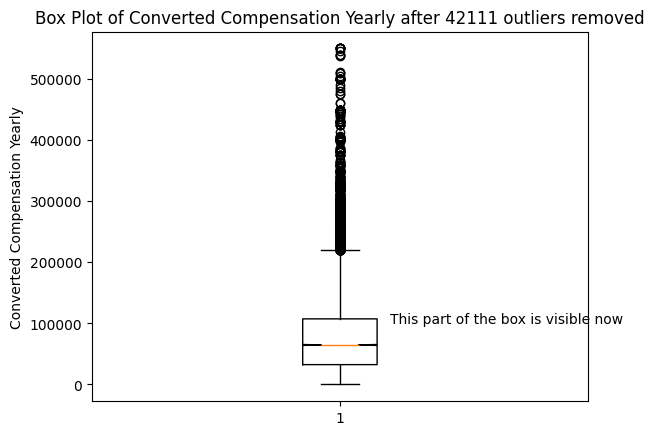

In [62]:
plt.boxplot(second_round_outliers['ConvertedCompYearly'], notch=True)
plt.title('Box Plot of Converted Compensation Yearly after 42111 outliers removed')
plt.ylabel('Converted Compensation Yearly')
plt.annotate("This part of the box is visible now", [1.1, 100000])
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [63]:
##Write your code here
# Calculate Q1 (25th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
# Calculate Q3 (75th percentile)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1
print('IQR = ', IQR)

IQR =  75259.5


In [64]:
# Outlier threshold
upper_threshold = (1.5*IQR+Q3)
lower_threshold = (Q1-1.5*IQR)
print(upper_threshold)
print(lower_threshold)

220860.75
-80177.25


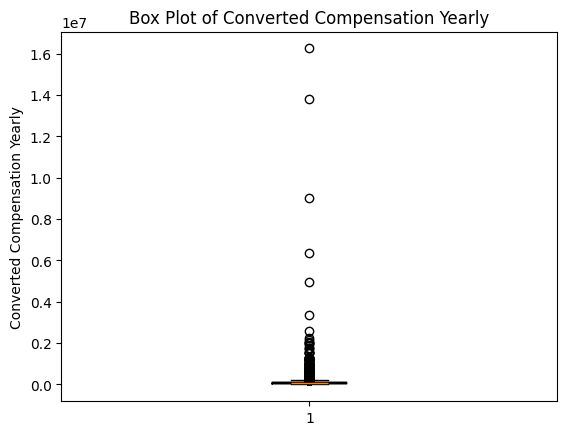

In [65]:
# Box plot 
plt.boxplot(df_no_outliers['ConvertedCompYearly'], notch=True)
plt.title('Box Plot of Converted Compensation Yearly')
plt.ylabel('Converted Compensation Yearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [66]:
##Write your code here
second_round_outliers.shape

(23326, 114)

**Comments:**
- After the outliers had been removed, a significant data points were lost through the process, and the dataframe shrinked down to 23326 data lines from the original of 63437

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [70]:
##Write your code here
## Call a df to include Age and other numerical cols:
num_Age = second_round_outliers.loc[:, ['Age'] + second_round_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()].reset_index()

In [72]:
num_Age.columns

Index(['index', 'Age', 'ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat'],
      dtype='object')

In [73]:
num_Age.head(5)

,index,Age,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,72,18-24 years old,73,2040000.0,3.0,90.0,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,7322.0,10.0
1,374,25-34 years old,375,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30074.0,NaN
2,379,35-44 years old,380,85000.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91295.0,10.0
3,385,35-44 years old,386,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53703.0,NaN
4,389,25-34 years old,390,110000.0,8.0,10.0,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,110000.0,10.0


In [76]:
# Transform the values in Age into numerical
# Define a function to convert age categories to numerical values
def convert_age_to_numeric(age):
    if age == 'Under 18 years old':
        return 17
    elif age == '18-24 years old':
        return (18 + 24) / 2
    elif age == '25-34 years old':
        return (25 + 34) / 2
    elif age == '35-44 years old':
        return (35 + 44) / 2
    elif age == '45-54 years old':
        return (45 + 54) / 2
    elif age == '55-64 years old':
        return (55 + 64) / 2
    elif age == '65 years or older':
        return 70
    else:
        return None

# Apply the function to the Age column to create Age_numeric
num_Age['Age_numerical'] = num_Age['Age'].apply(convert_age_to_numeric)

In [78]:
# Map Age_numerical column as an extra column
num_Age.head()

,index,Age,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_numerical
0,72,18-24 years old,73,2040000.0,3.0,90.0,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,7322.0,10.0,21.0
1,374,25-34 years old,375,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30074.0,NaN,29.5
2,379,35-44 years old,380,85000.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91295.0,10.0,39.5
3,385,35-44 years old,386,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53703.0,NaN,39.5
4,389,25-34 years old,390,110000.0,8.0,10.0,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,110000.0,10.0,29.5


In [84]:
num_with_Age = num_Age.loc[:, ['Age_numerical', 'WorkExp', 'CompTotal', 'ConvertedCompYearly', 'JobSat']].reset_index()
print(num_with_Age.shape)

(23326, 6)


**Comments:**
- The JobSat is the final score from the other 10 JobSatPoint_1 to _10. Hence, we can omit the other 10 and keep the JobSat as it is
- We then remove the NaN from it.
- The RespondedId is not essential

In [86]:
# Check NaN values
num_with_Age.isnull().sum()

index                     0
Age_numerical             9
WorkExp                7249
CompTotal                 0
ConvertedCompYearly       0
JobSat                 7319
dtype: int64

In [88]:
# Calculate the mode for WorkExp and JobSat
mode_WorkExp = num_with_Age['WorkExp'].mode()[0]  # Get the first mode value
mode_JobSat = num_with_Age['JobSat'].mode()[0]    # Get the first mode value

# Replace NaN values with the mode
num_with_Age['WorkExp'].fillna(mode_WorkExp, inplace=True)
num_with_Age['JobSat'].fillna(mode_JobSat, inplace=True)

# see the dataframe again
num_with_Age.isnull().sum()

index                  0
Age_numerical          9
WorkExp                0
CompTotal              0
ConvertedCompYearly    0
JobSat                 0
dtype: int64

In [89]:
# Check for NaN values before removing
print(num_with_Age['Age_numerical'].isnull().sum())

# Remove NaN values (if that's what you intended)
num_with_Age = num_with_Age.dropna()

# Check for NaN values after removing
print(num_with_Age['Age_numerical'].isnull().sum())

# Print the DataFrame to inspect
print(num_with_Age)

9
0
       index  Age_numerical  WorkExp  CompTotal  ConvertedCompYearly  JobSat
0          0           21.0      3.0  2040000.0               7322.0    10.0
1          1           29.5      3.0    28000.0              30074.0     8.0
2          2           39.5      7.0    85000.0              91295.0    10.0
3          3           39.5      3.0    50000.0              53703.0     8.0
4          4           29.5      8.0   110000.0             110000.0    10.0
...      ...            ...      ...        ...                  ...     ...
23321  23321           29.5      3.0   468000.0              44640.0     8.0
23322  23322           49.5     30.0   170000.0             170000.0     9.0
23323  23323           39.5      3.0   116844.0             116844.0     8.0
23324  23324           21.0      1.0    12000.0              12000.0     3.0
23325  23325           59.5     40.0   200000.0             222834.0    10.0

[23317 rows x 6 columns]


In [91]:
num_with_Age["Age_numerical"].describe()

count    23317.000000
mean        34.196938
std          9.892789
min         17.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         70.000000
Name: Age_numerical, dtype: float64

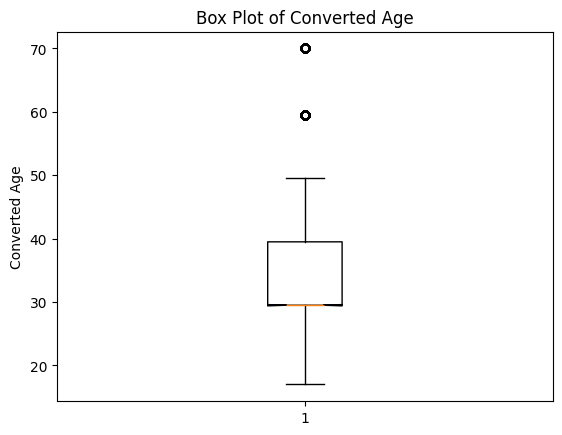

In [92]:
# Box plot 
plt.boxplot(num_with_Age["Age_numerical"], notch=True)
plt.title('Box Plot of Converted Age')
plt.ylabel('Converted Age')
plt.show()

index                 -0.041036
Age_numerical          1.000000
WorkExp                0.574957
CompTotal             -0.010335
ConvertedCompYearly    0.336903
JobSat                 0.065678
Name: Age_numerical, dtype: float64


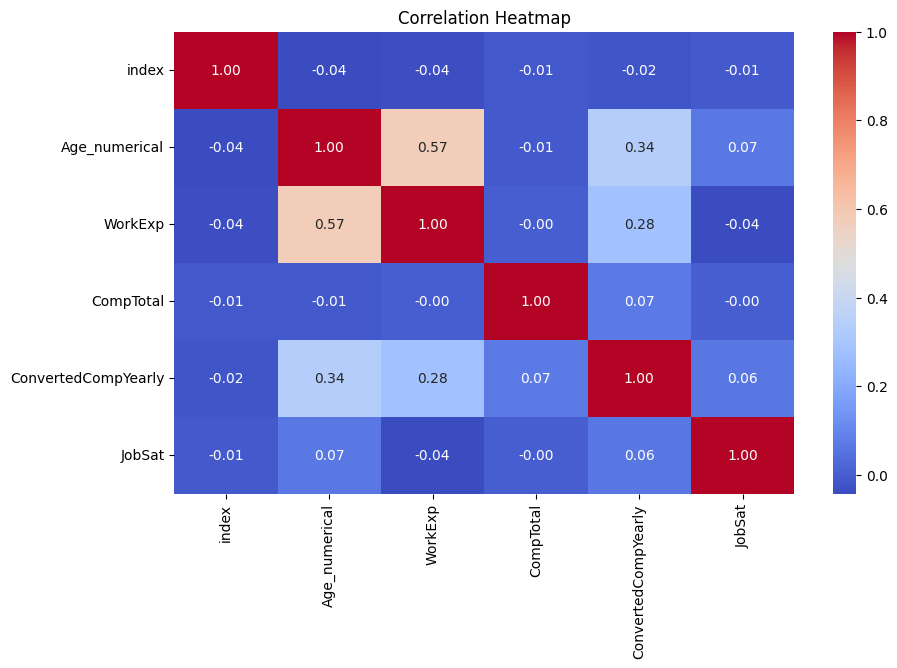

In [90]:
# Assuming num_with_Age is your DataFrame
# Calculate the correlation matrix
correlation_matrix = num_with_Age.corr()

# Display the correlation between Age_numerical and other columns
print(correlation_matrix['Age_numerical'])

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Comments:**
- It was a lovely heatmap from the correlation results that show a strong postive relationship between Age and WorkExp, this is a natural relationship.
- It is interesting to see that the Age negatively correlated to the CompTotal but positively driving the ConvertedCompYearly.

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
